In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [60]:
def loc_id_cnt(num):
    df = pd.read_csv('./data/%02d.csv'%num)
    df_res = df.groupby(['time_stamp', 'loc_id']).agg({ 'phone_id':'count'})
    df_res.reset_index(inplace=True)
    return df_res

In [61]:
df = pd.DataFrame()
for i in range(1, 11):
    _df = loc_id_cnt(i)
    df = df.append(_df)

In [62]:
# 时间维度
df['datetime'] = df.time_stamp.apply(pd.to_datetime)
del df['time_stamp']
df['month'] = df.datetime.apply(lambda x: x.month)
df['day'] = df.datetime.apply(lambda x: x.day)
df['hour'] = df.datetime.apply(lambda x: x.hour)
df['weekday'] = df.datetime.apply(lambda x: x.weekday())

In [63]:
# 加入假期，节假日
"""
def isSummer(x):
    if x > '2017-07-15 00:00:00' and x < '2017-09-03:00:00:00':
        return 1
    else:
        return 0

def isSummerNear(x):
    if x > '2017-07-12 00:00:00' and x < '2017-07-15:00:00:00':
        return 1
    elif x > '2017-09-03 00:00:00' and x < '2017-09-06:00:00:00'::
        return 0 
"""
def isHoliday(x):
    if x.date() == datetime.date(2017, 4, 4) or \
       x.date() == datetime.date(2017, 5, 1) or \
       x.date() == datetime.date(2017, 5, 30) or \
       x.date() == datetime.date(2017, 1, 1) or \
       x.date() >= datetime.date(2017, 10, 1) and x.date() <= datetime.date(2017, 10, 8):
        return 1
    else:
        return 0

df['isHoliday'] = df.datetime.apply(isHoliday)

In [64]:
loc_df = []
for i in range(1, 32):
    _df = df[df.loc_id==i]
    _df.reset_index(inplace=True, drop=True)
    loc_df.append(_df)
#del df

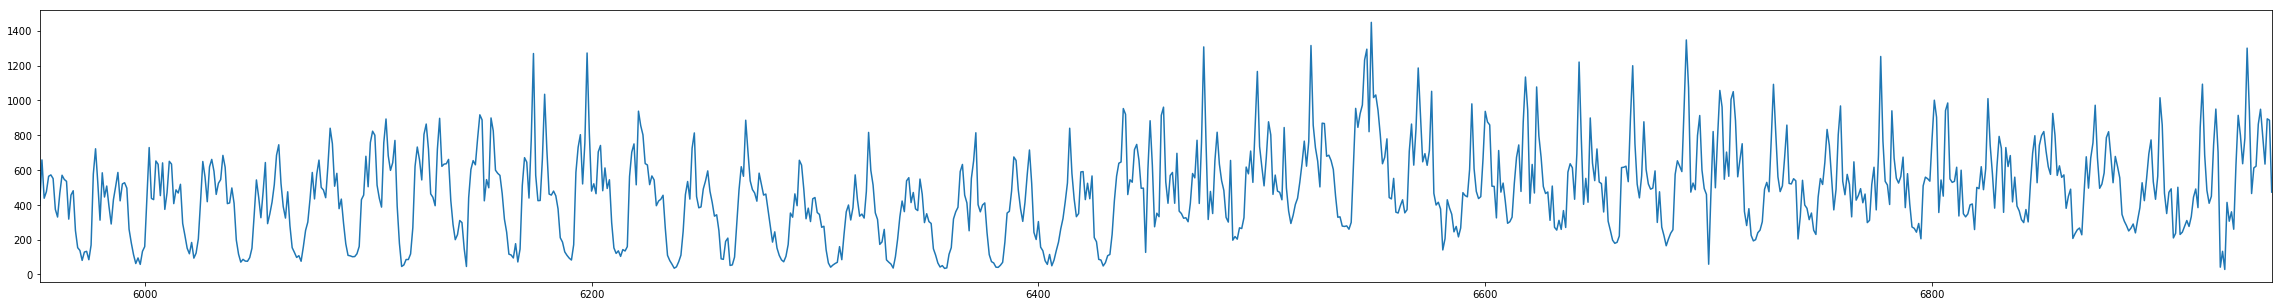

In [65]:
loc_df[0][-1000:].phone_id.plot(figsize=(40,5))
plt.show()

In [68]:
def show1(n):
    ddf = loc_df[n].set_index('datetime')
    quantile95 = round(ddf.phone_id.quantile(0.95))
    ddf['id_cnt'] = ddf.phone_id.apply(lambda x: quantile95 if x > quantile95 else x)
    quantile05 = round(ddf.phone_id.quantile(0.05))
    ddf['id_cnt'] = ddf.phone_id.apply(lambda x: quantile05 if x < quantile05 else x)
    ddf.id_cnt.plot(figsize=(20,5))
    plt.show()

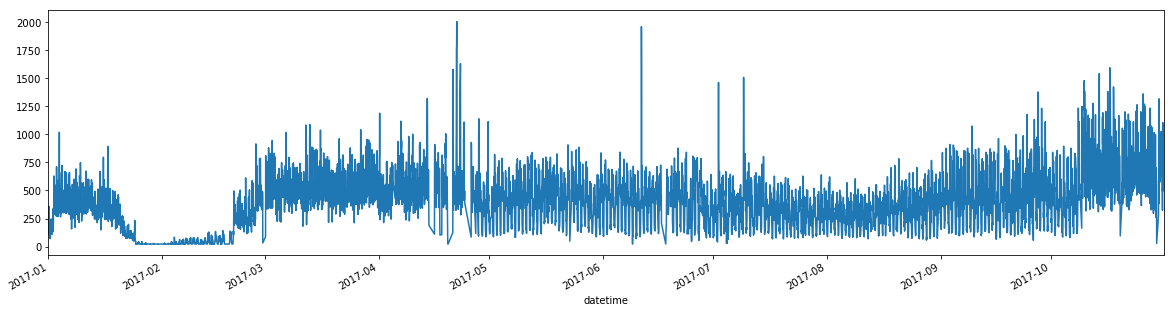

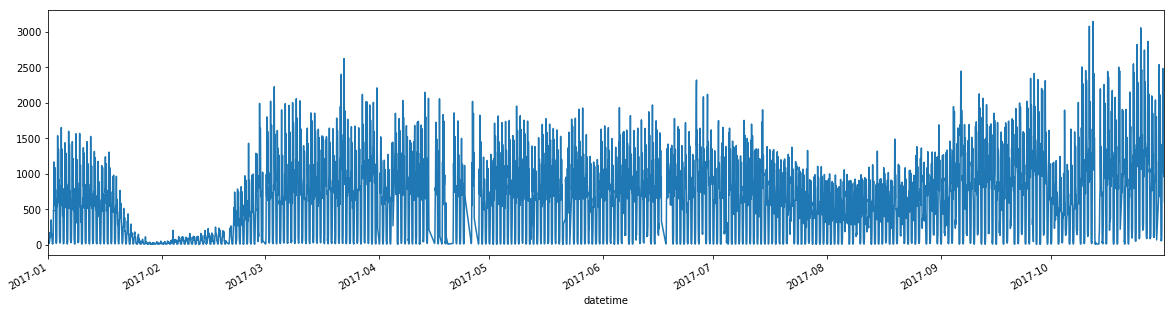

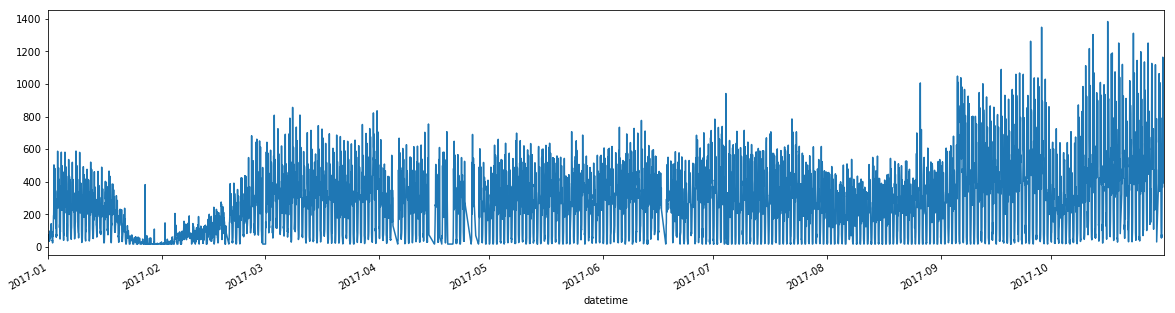

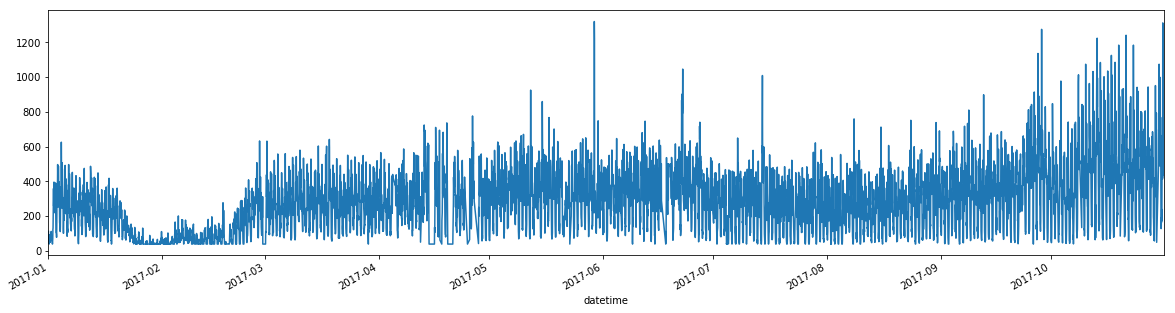

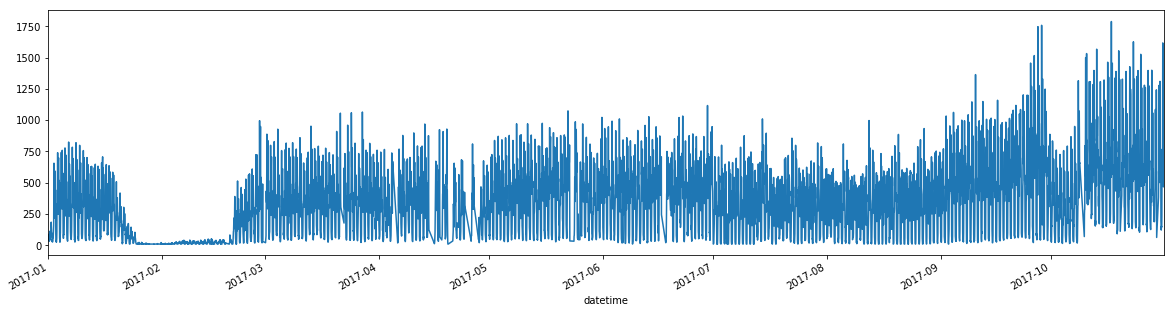

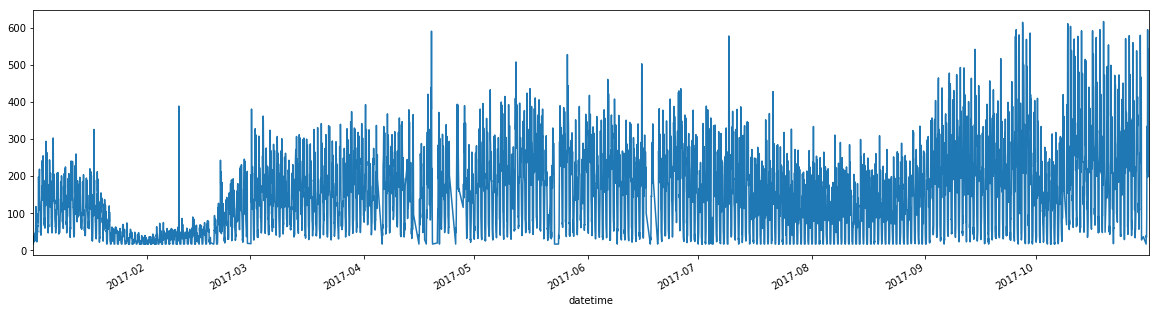

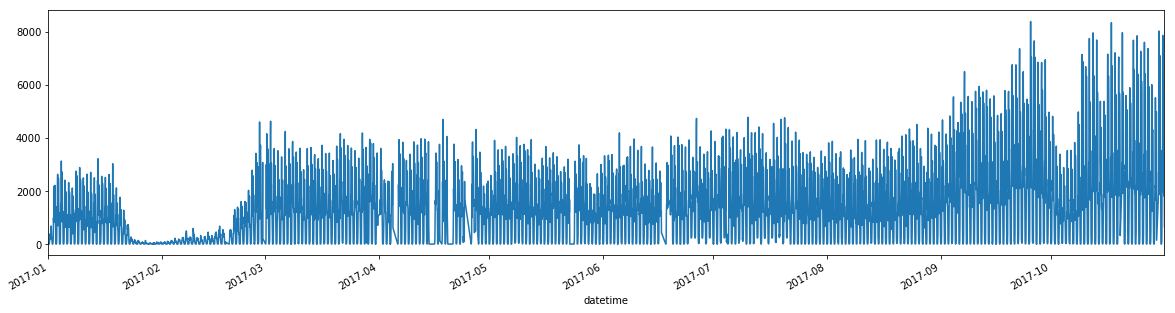

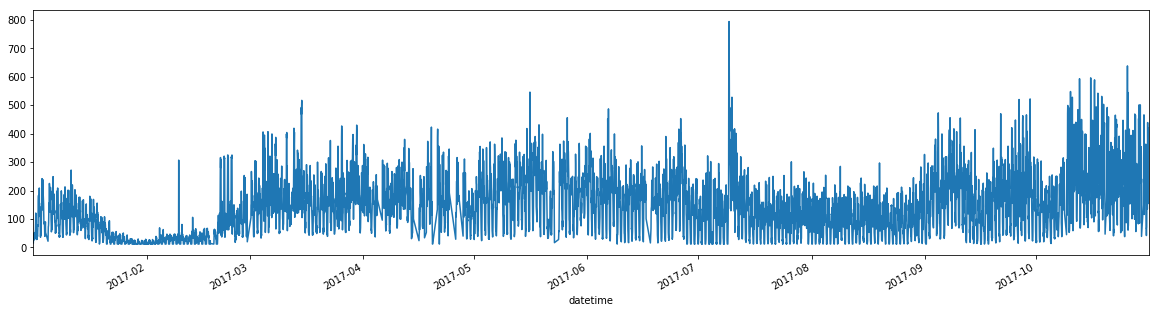

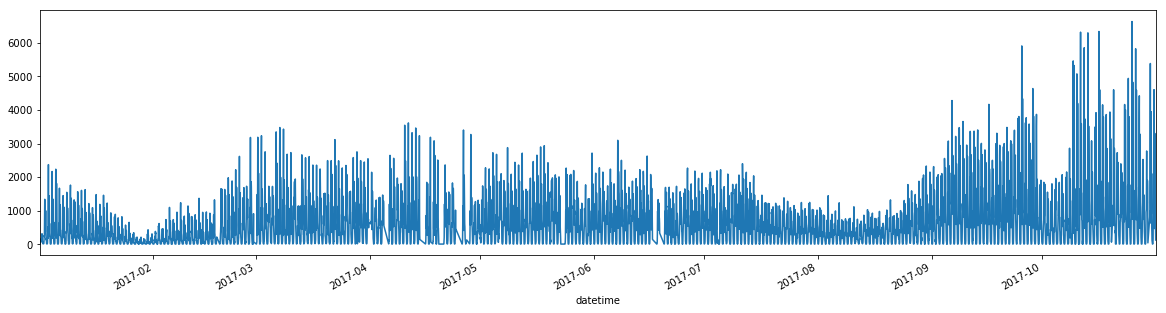

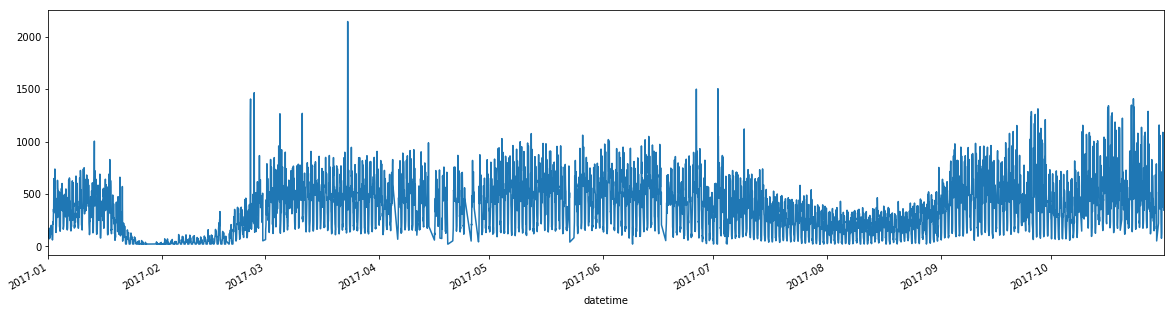

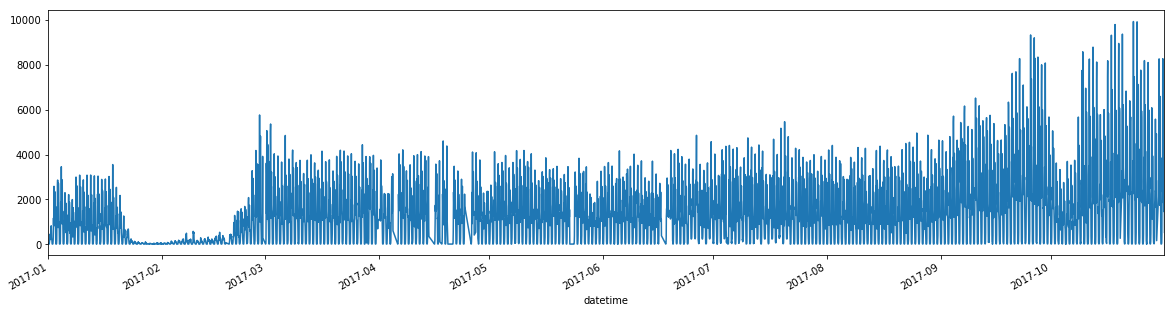

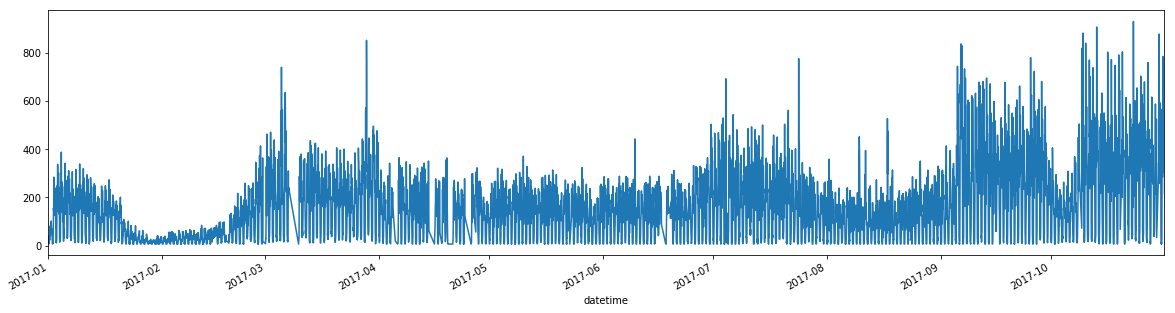

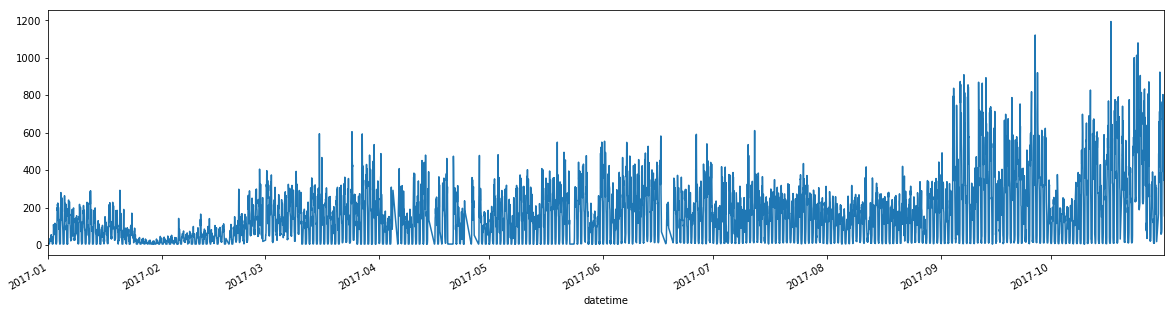

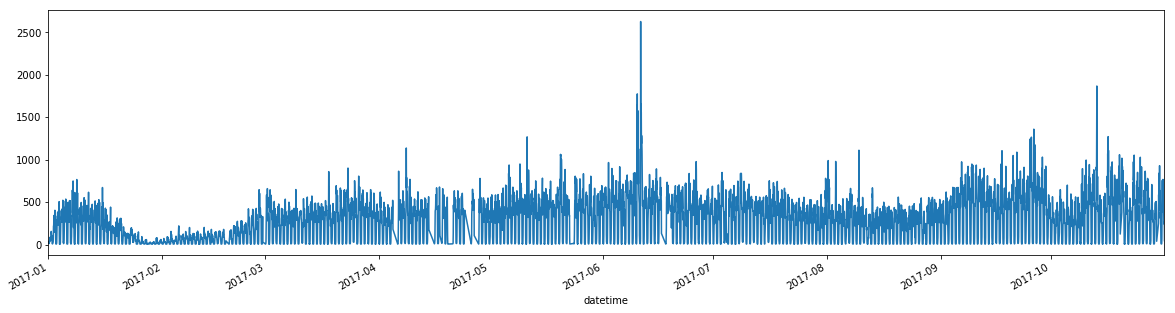

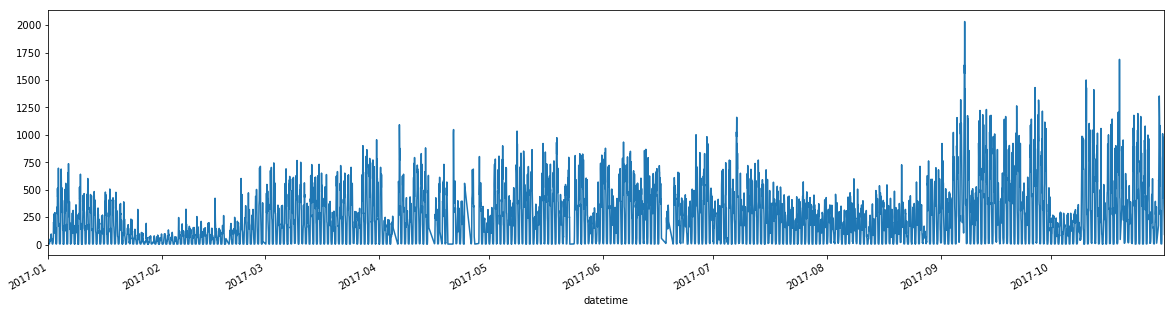

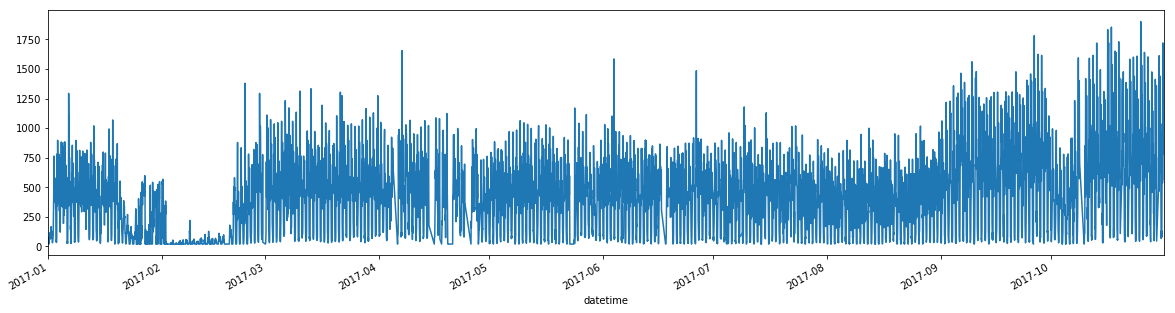

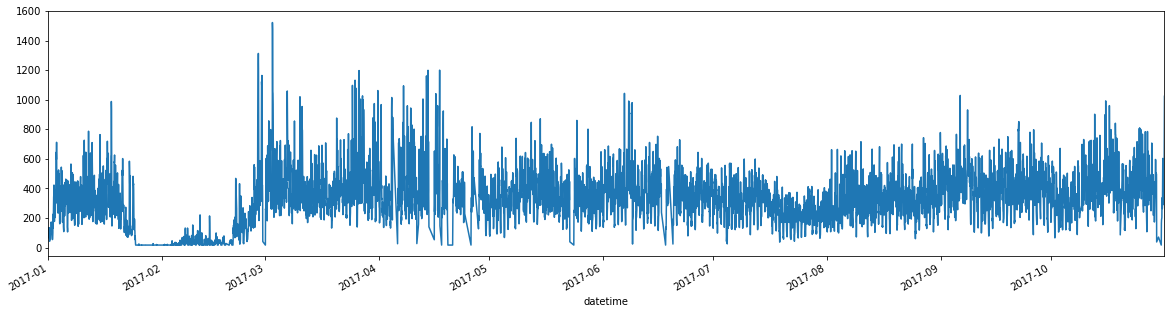

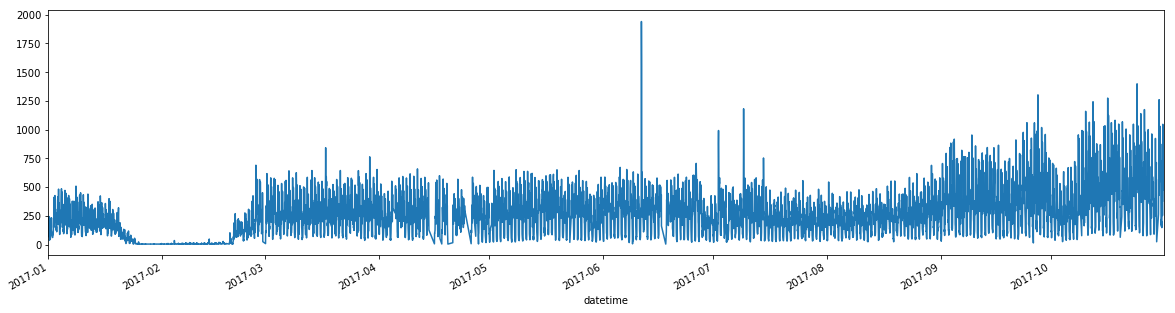

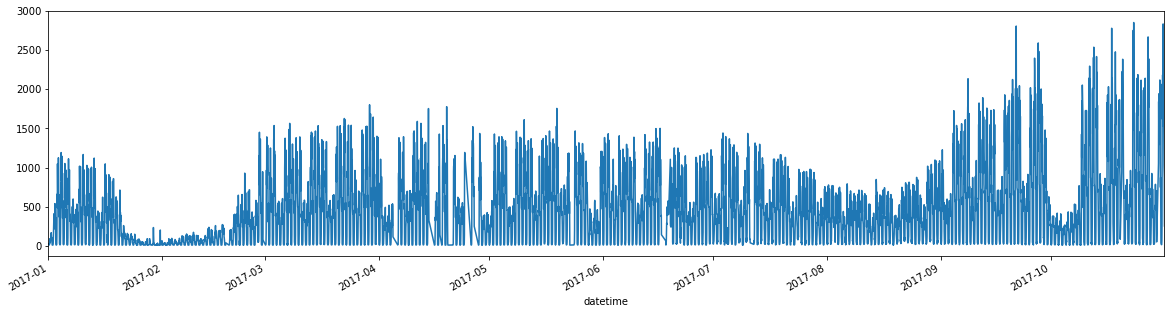

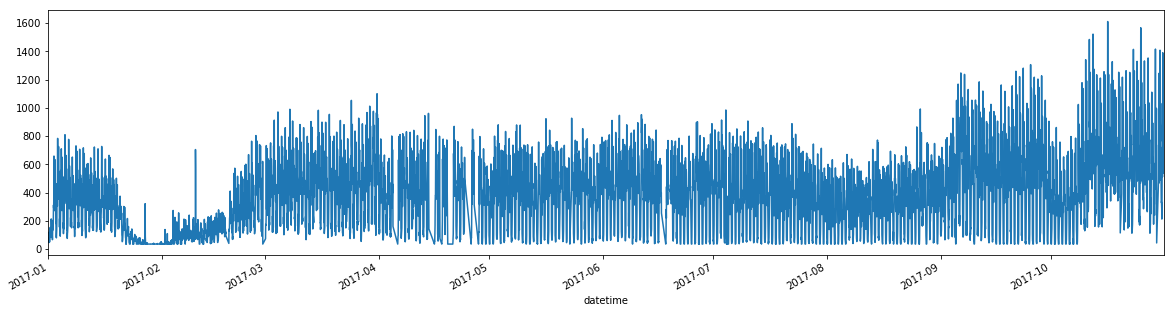

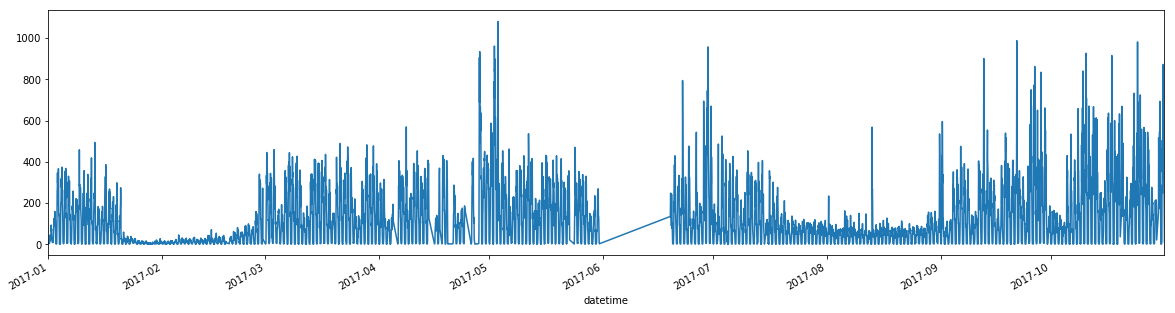

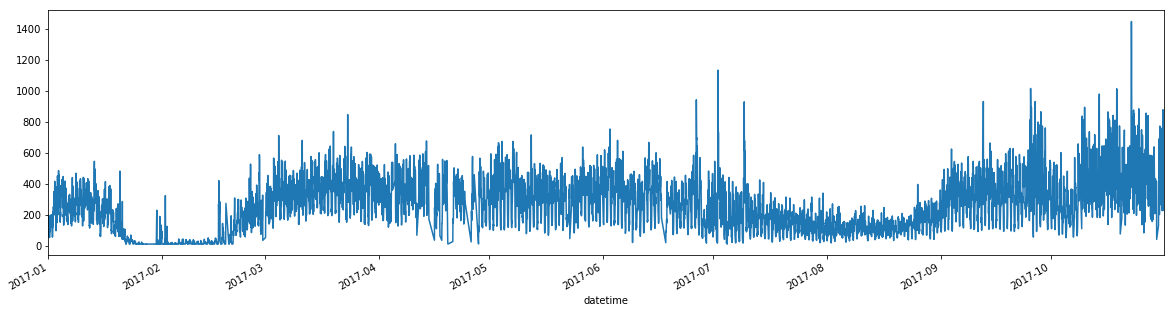

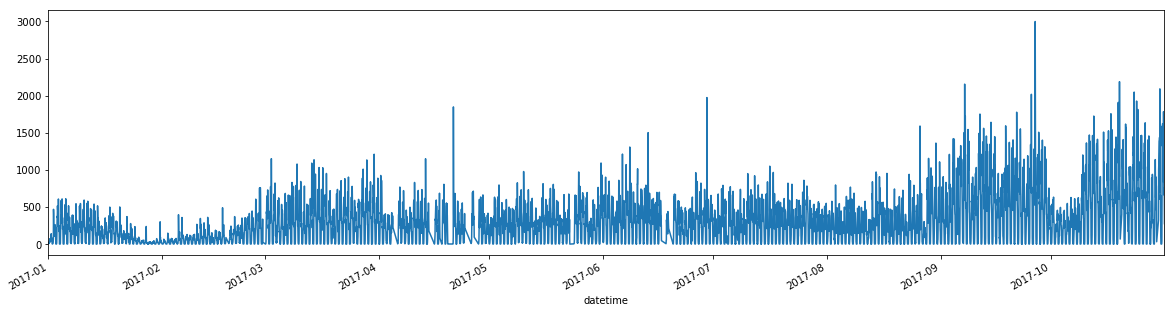

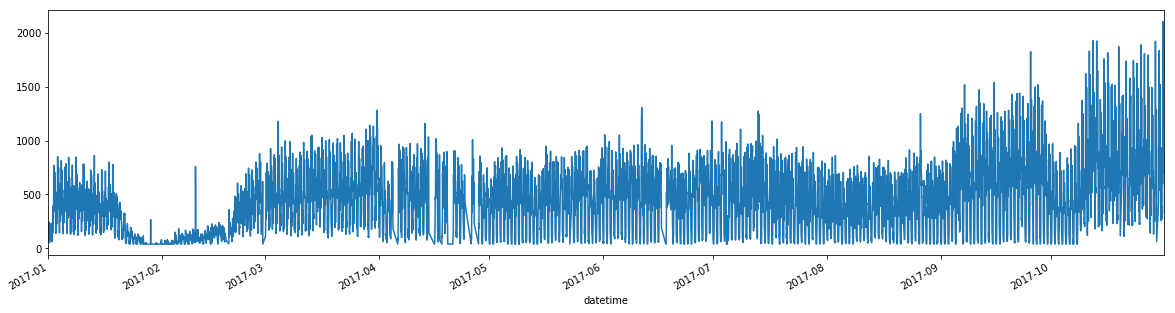

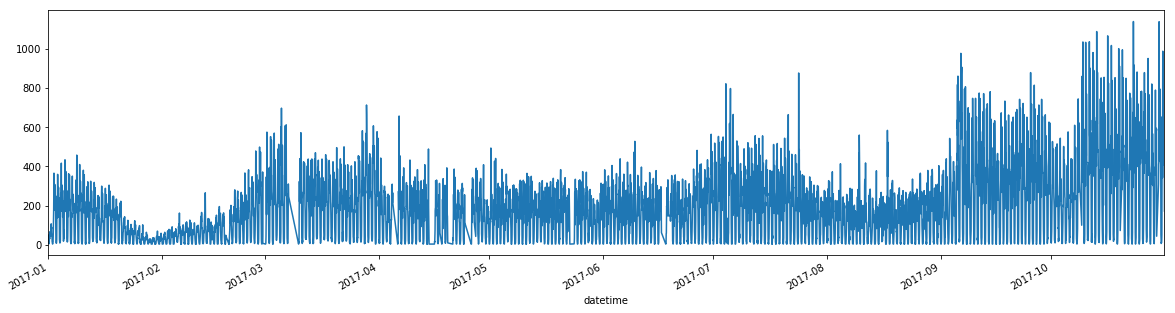

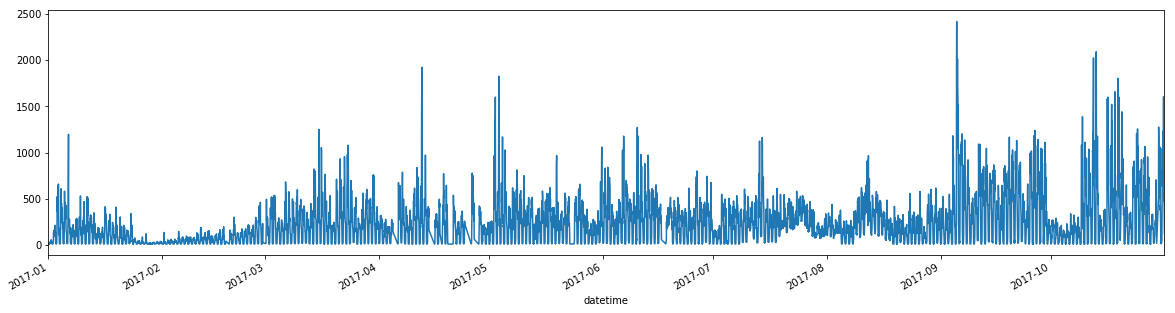

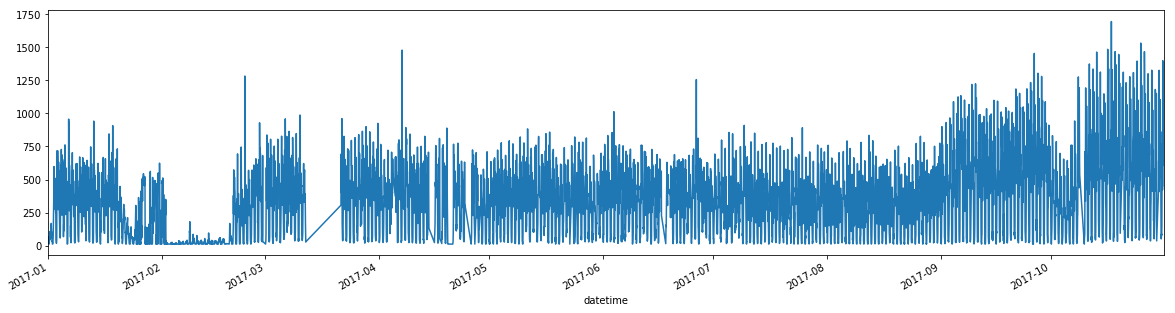

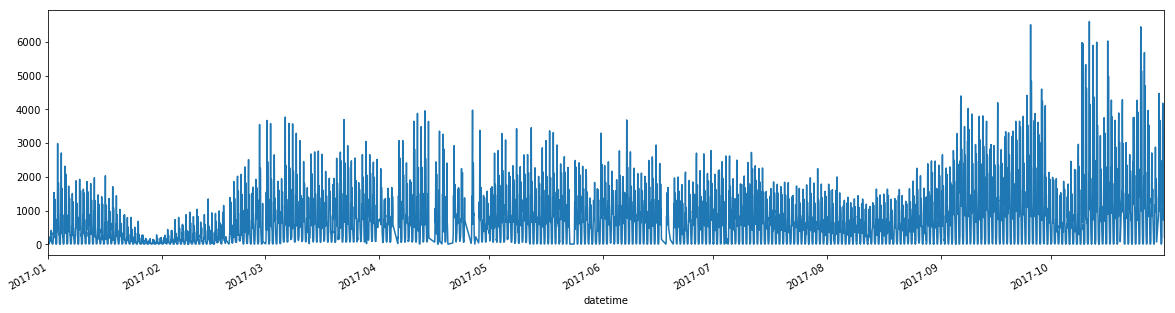

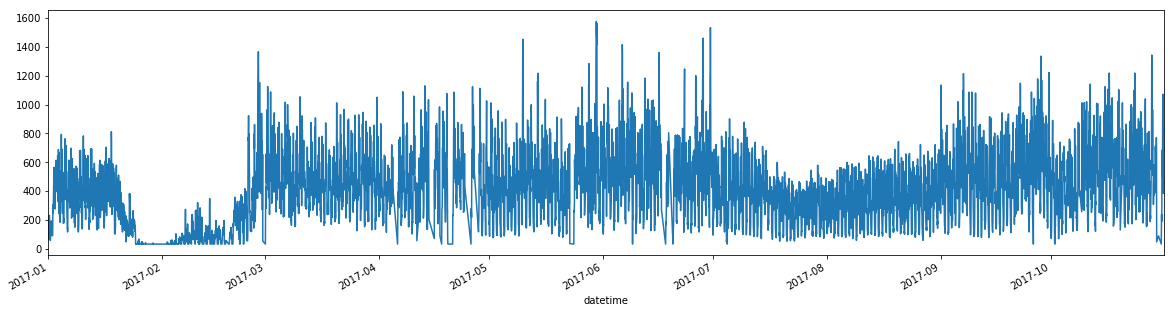

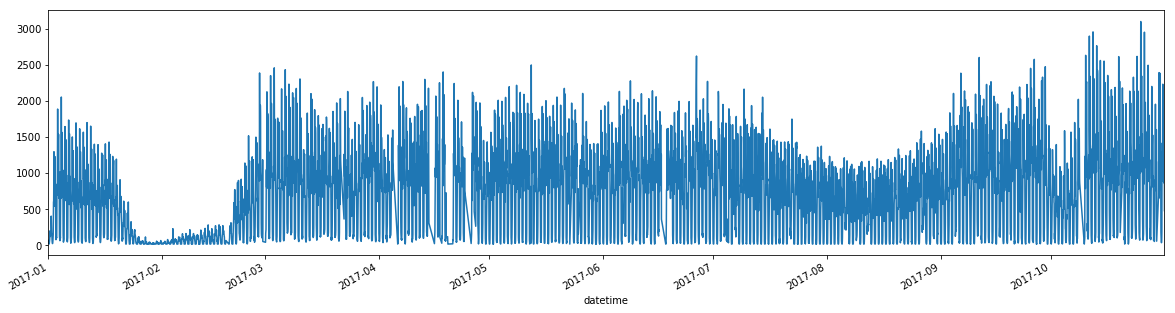

IndexError: list index out of range

In [71]:
for i in range(1, 33):
    show1(i)